In [1]:
from pathlib import Path
from hjelpefunksjonar import f2t

%matplotlib widget
import pickle

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

from check_collision import check_all_collisions
from f import f
from rib import Rib

plt.rcParams["font.family"] = "STIXGeneral"
plt.rcParams['mathtext.fontset'] = 'stix'

ribs = [Rib([[-101.,151.],[-99.,151.],[-99.,150.],[-101.,150.]]) , Rib([[1001.,151.],[999.,151.],[999.,150.],[1001.,150.]]) ,Rib(np.asarray([[-1000.,0],[1000.,0],[1000.,-100.],[-1000.,-100.]]))]
    


runs/analytisk/RK45_RK45_200_[0.05, 0.06]_1e-02_linear_test27.10.22_fri_t.pickle


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

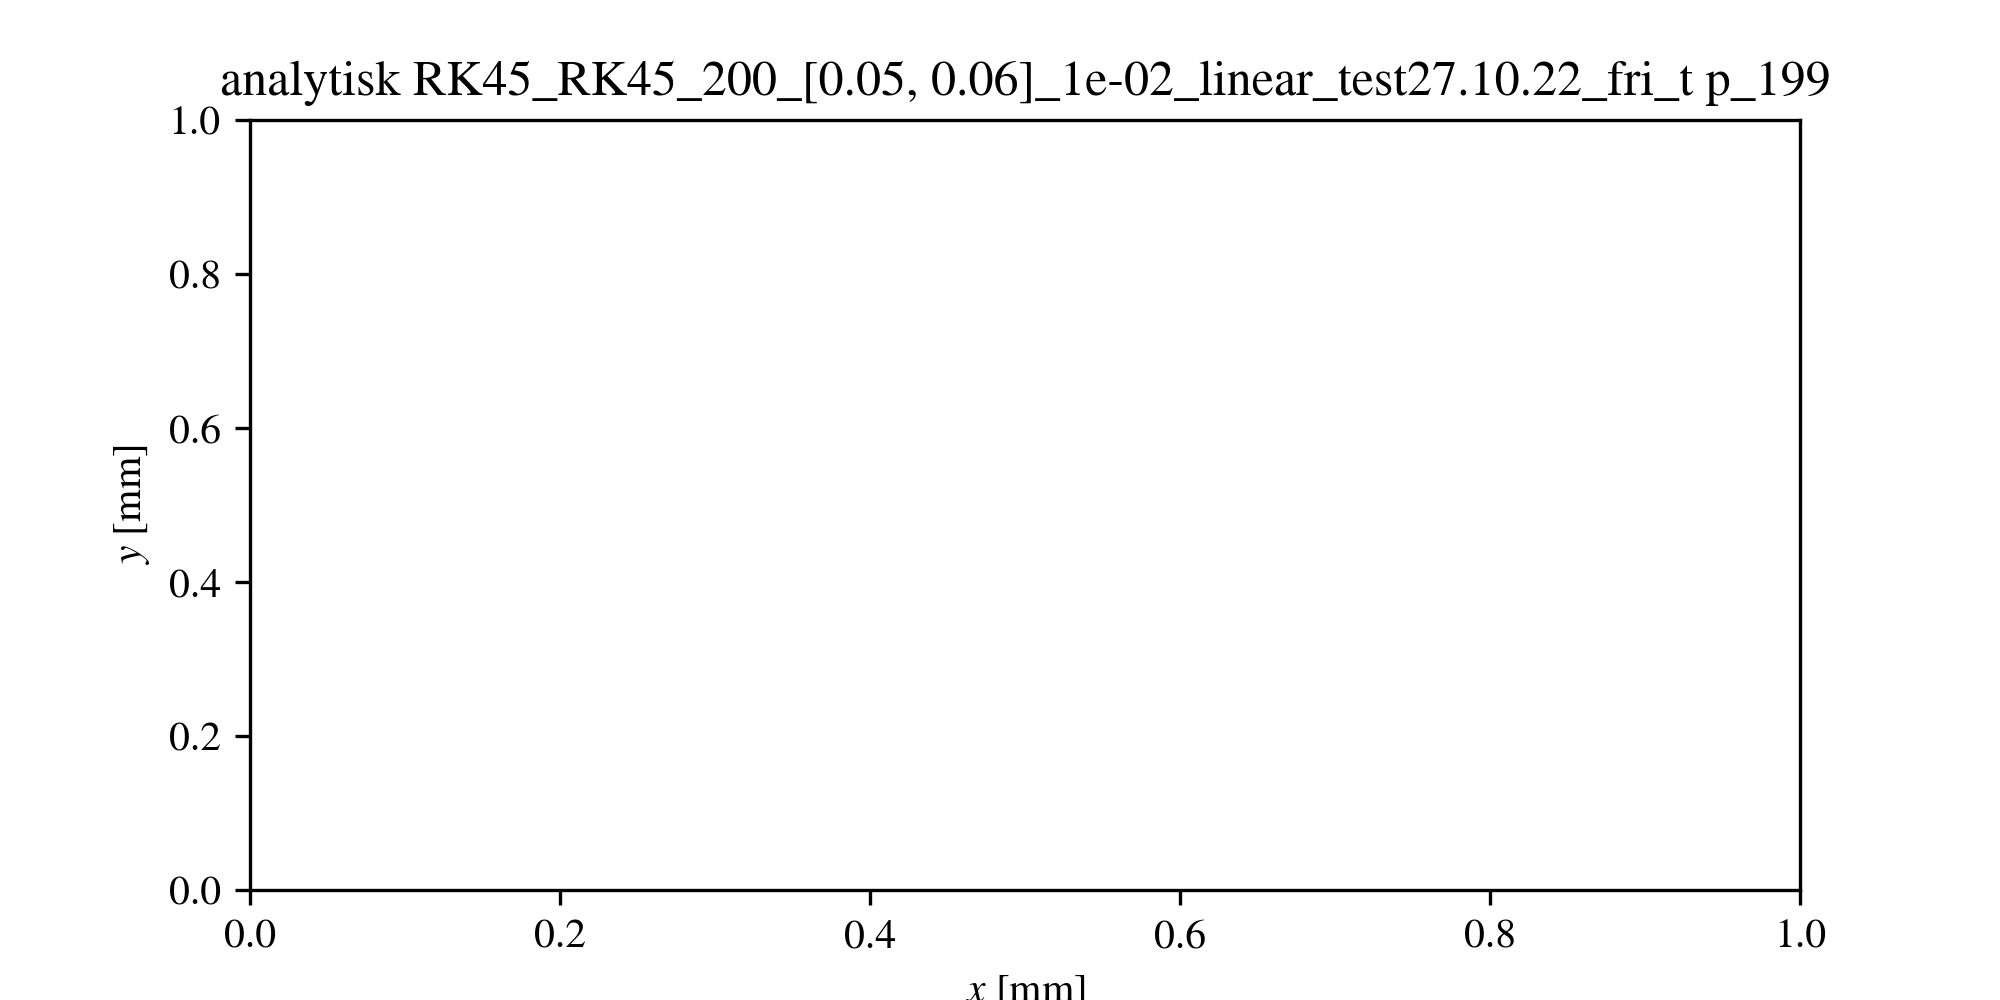

In [24]:
plt.close('all') 
#partikkelfil= Path("./partikkelsimulasjonar/particles_rib50_Q40_1_BDF_200_[0.05, 0.06]_1e-01_linear.pickle")
for partikkelfil in Path("./runs/analytisk/").glob("RK45_*_200_[*27*fri*"):
    print(partikkelfil)
    with open(partikkelfil, 'rb') as fil:
        partiklar = pickle.load(fil)
    skalering = 1
    myDPI = 300

    x = (ribs[0].get_rib_middle()[0],ribs[1].get_rib_middle()[0])
    x_width = x[1] - x[0]

    fig, ax  = plt.subplots(figsize=(2000/myDPI,1000/myDPI),dpi=myDPI)
    # ax.add_patch(Polygon(ribs[0].vertices, facecolor='red'))
    # ax.add_patch(Polygon(ribs[1].vertices, facecolor='red'))
    ax.set_xlabel(r'$x$ [mm]')
    ax.set_ylabel(r'$y$ [mm]')
    ax.set_title(f"{partikkelfil.parent.name} {partikkelfil.stem} p_{p.index}")
    for p in partiklar:
        sti = p.sti_dict
        init = int(sti['init_time'])
        final = int(sti['final_time'])
        plott_array = np.zeros((final+1-init,4))
        for frame in range(init,final+1):
            plott_array[frame-init,:] = np.asarray(sti[frame]['position'])#+np.asarray([sti[frame]['loops']*x_width,0,0,0])
    # if not np.any(plott_array[:,1]<0):
        #     continue

        ax.plot(plott_array[:,0], plott_array[:,1], linewidth=0.5)

    
        # if p.index > 0:
        #     break

runs/analytisk/RK45_RK45_200_[0.05, 0.06]_1e-02_linear_test27.10.22_fri_t.pickle


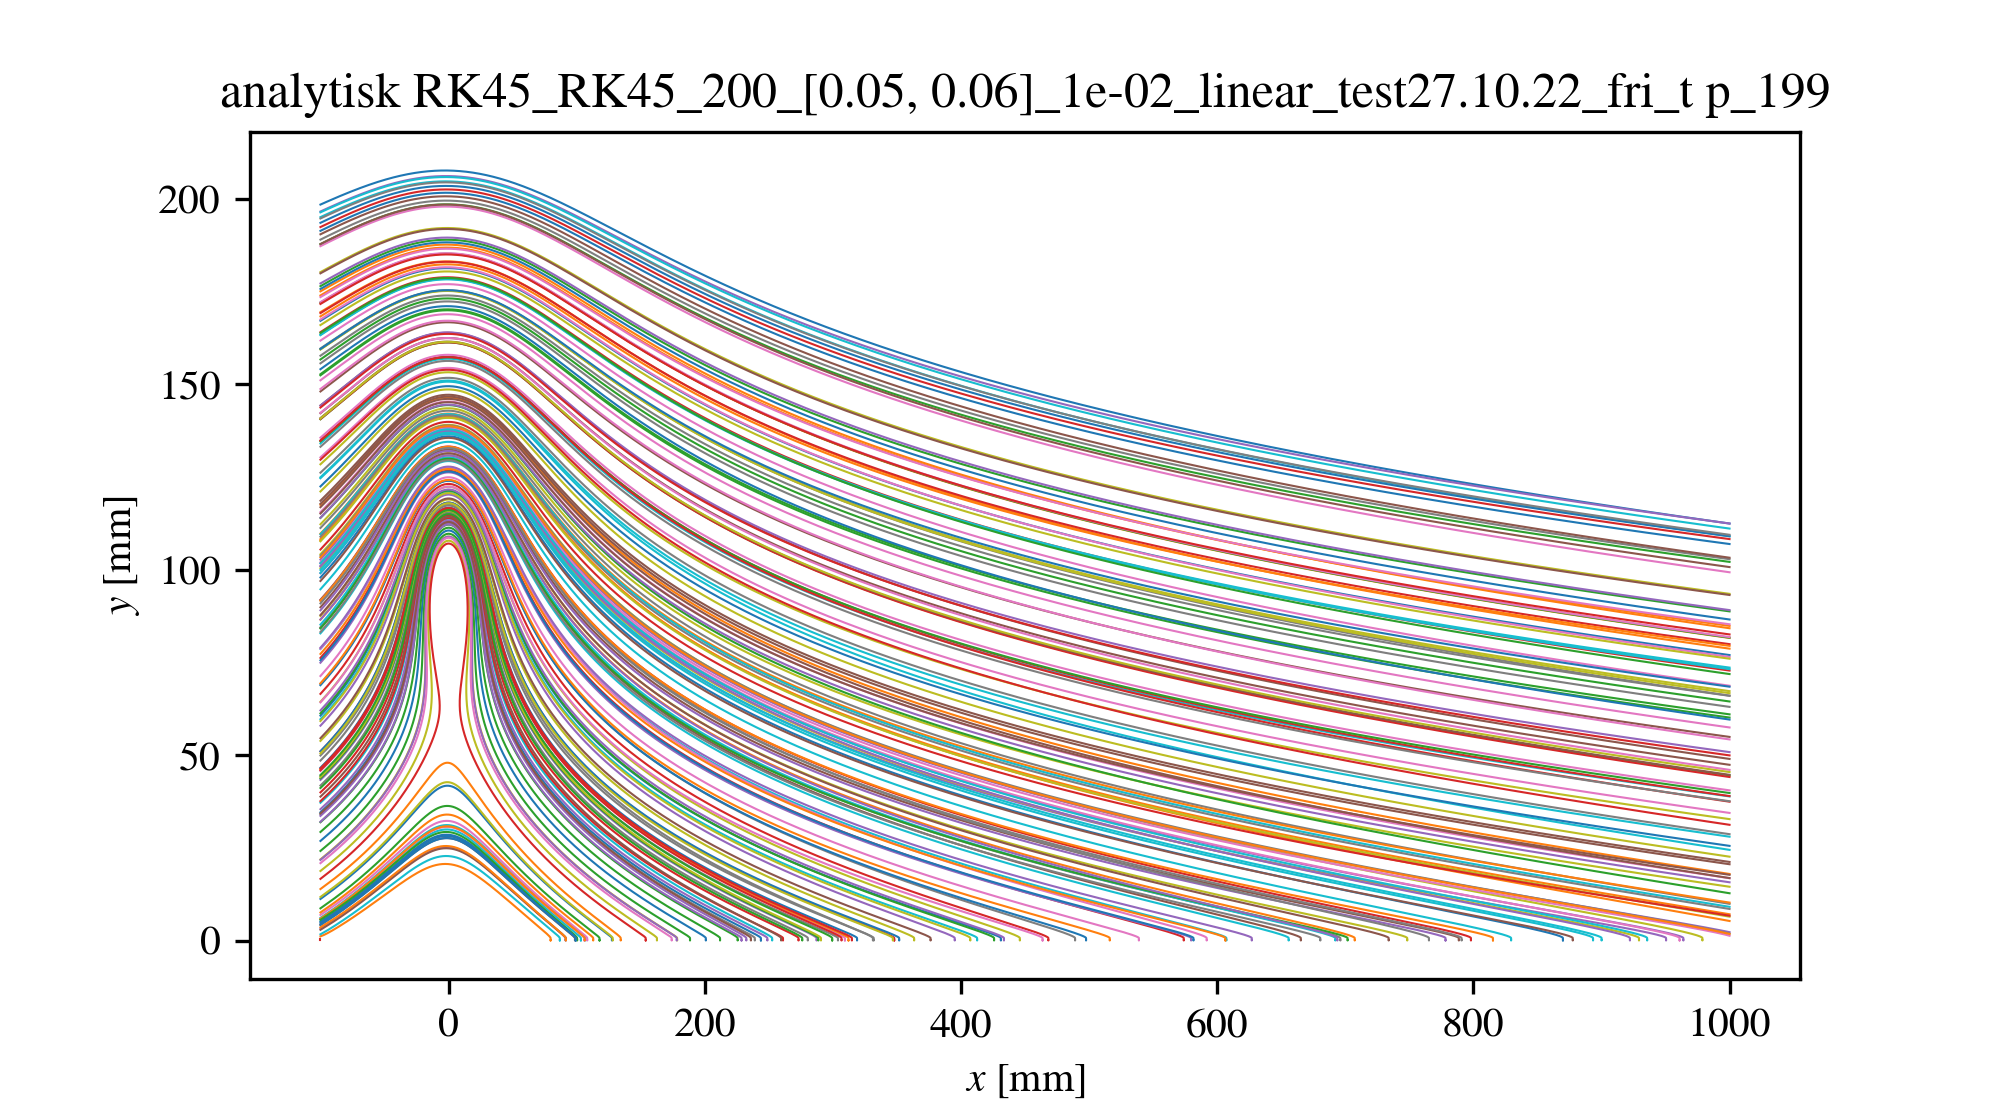

In [53]:
plt.close('all') 
#partikkelfil= Path("./partikkelsimulasjonar/particles_rib50_Q40_1_BDF_200_[0.05, 0.06]_1e-01_linear.pickle")
for partikkelfil in Path("./runs/analytisk/").glob("RK45_*_200_[*27*fri*"):
    print(partikkelfil)
    with open(partikkelfil, 'rb') as fil:
        partiklar = pickle.load(fil)
    skalering = 1
    myDPI = 300

    x = (ribs[0].get_rib_middle()[0],ribs[1].get_rib_middle()[0])
    x_width = x[1] - x[0]

    fig, ax  = plt.subplots(figsize=(2000/myDPI,1100/myDPI),dpi=myDPI)
    # ax.add_patch(Polygon(ribs[0].vertices, facecolor='red'))
    # ax.add_patch(Polygon(ribs[1].vertices, facecolor='red'))
    ax.set_xlabel(r'$x$ [mm]')
    ax.set_ylabel(r'$y$ [mm]')
    ax.set_title(f"{partikkelfil.parent.name} {partikkelfil.stem} p_{p.index}")
    for p in partiklar:
        sti = np.concatenate(p.sti_dict)
        
    # if not np.any(plott_array[:,1]<0):
        #     continue

        ax.plot(sti[:,1], sti[:,2], linewidth=0.5)

    
        # if p.index > 0:
        #     break

In [28]:
partikkelfil

PosixPath('runs/analytisk/RK45_RK45_200_[0.05, 0.06]_1e-02_linear_test27.10.22_fri_t.pickle')

In [48]:
#for partikkelfil in Path("./runs/analytisk/").glob("RK45_RK23_200_[*"):
partikkelfil = Path('runs/analytisk/RK45_RK45_200_[0.05, 0.06]_1e-02_linear_test27.10.22_fri_t.pickle')
np.set_printoptions(formatter={'float': lambda x: "{0:>10.3f}".format(x)})
print(partikkelfil)
with open(partikkelfil, 'rb') as fil:
    partiklar = pickle.load(fil)
for p in partiklar:   
    sti = np.concatenate(p.sti_dict)
    print(p.index," ---------- ---------- --------------------------------------------------")
    print(sti)
    break

runs/analytisk/RK45_RK45_200_[0.05, 0.06]_1e-02_linear_test27.10.22_fri_t.pickle
0  ---------- ---------- --------------------------------------------------
[[     0.000   -100.000     26.873      0.000      0.000]
 [     0.000   -100.000     26.873      1.317      0.388]
 [     0.000   -100.000     26.873     13.600      4.009]
 ...
 [    14.410    200.851      0.026      0.000      0.000]
 [   114.410    200.851      0.026      0.000      0.000]
 [   179.900    200.851      0.026      0.000      0.000]]


In [49]:
sti.shape

(2926, 5)